In [1]:
#Zad1
import pandas as pd
import requests

#Pobieranie danych jako listy słowników
def pobieranie_danych(start_date, end_date, currency):
    request_url = 'http://api.nbp.pl/api/exchangerates/rates/A/' + currency + '/' + start_date + '/' + end_date + '/'
    currency_req = requests.get(request_url)
    currency_data = currency_req.json()
    return currency_data['rates'] 

#Wykorzystanie powyższej funkcji do pobrania danych jako dataframe
def pobieranie_danych_jako_dataframe(start_date, end_date, currency):
    currency_data = pobieranie_danych(start_date, end_date, currency)
    return pd.DataFrame.from_dict(currency_data)

In [2]:
#Zad2
usd = pobieranie_danych_jako_dataframe('2019-09-01', '2019-09-30', 'USD')
eur = pobieranie_danych_jako_dataframe('2019-09-01', '2019-09-30', 'EUR')

In [3]:
#Zad3
import pandas as pd

usd['effectiveDate'] = pd.to_datetime(usd['effectiveDate']) 
print(usd['effectiveDate'].dtypes) 
usd = usd.set_index("effectiveDate").drop(columns='no')
print(usd.head())

eur['effectiveDate'] = pd.to_datetime(eur['effectiveDate']) 
print(eur['effectiveDate'].dtypes) 
eur = eur.set_index("effectiveDate").drop(columns='no') 
print(eur.head())

datetime64[ns]
                  mid
effectiveDate        
2019-09-02     3.9819
2019-09-03     3.9882
2019-09-04     3.9414
2019-09-05     3.9330
2019-09-06     3.9315
datetime64[ns]
                  mid
effectiveDate        
2019-09-02     4.3691
2019-09-03     4.3667
2019-09-04     4.3385
2019-09-05     4.3409
2019-09-06     4.3392


In [4]:
#zad 4
from numpy import corrcoef, array

usd = pobieranie_danych('2019-09-01', '2019-09-30', 'USD')  
eur = pobieranie_danych('2019-09-01', '2019-09-30', 'EUR')

usd2 = []
for tmp in usd:
    usd2.append(tmp['mid'])

eur2 = []
for tmp in eur:
    eur2.append(tmp['mid'])

print(corrcoef(array(usd2), array(eur2)))

[[1.         0.95958617]
 [0.95958617 1.        ]]


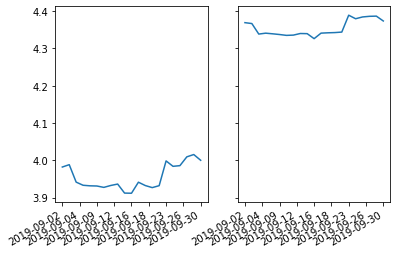

In [6]:
#Zad5
import matplotlib.pyplot as plt

dane_wykres_usd = pobieranie_danych_jako_dataframe('2019-09-01', '2019-09-30', 'USD').set_index(['effectiveDate'])['mid']
dane_wykres_eur = pobieranie_danych_jako_dataframe('2019-09-01', '2019-09-30', 'EUR').set_index(['effectiveDate'])['mid']

fig, axs = plt.subplots(1,2, sharex=True, sharey=True) 
axs[0].plot(dane_wykres_usd) 
axs[1].plot(dane_wykres_eur) 

fig.autofmt_xdate() 
tmp_x=9
axs[0].xaxis.set_major_locator(plt.MaxNLocator(tmp_x))

plt.show()